# Représentation du lien d'intéraction entre plusieurs protéines

- Saisir la protéine de départ (source)
- Saisir la liste de protéines d'arrivées dans le fichier liste_proteine.txt

In [6]:
source="VHL" 

## Librairie

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Appel de fonction

In [8]:
list_target=[]
with open("/content/gdrive/MyDrive/Graph_shortest_path/liste_proteine.txt","r") as f:
  for l in f.readlines():
    list_target.append(l.strip())

In [9]:
#Extract edges and nodes from the file
G=nx.Graph()
with open("/content/gdrive/MyDrive/Graph_shortest_path/edges_string.txt","r") as f:
    for l in f.readlines():
        for m in l.split():
            if m not in G.nodes():
                G.add_node(m)
        G.add_edge(l.split()[0],l.split()[1])
print(len(G.nodes()))
print(len(G.edges()))

16948
290849


**************************************************
SMAP  n'est pas dans la base de donnée
**************************************************
**************************************************
SEP6  n'est pas dans la base de donnée
**************************************************
**************************************************
  n'est pas dans la base de donnée
**************************************************
**************************************************
  n'est pas dans la base de donnée
**************************************************


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

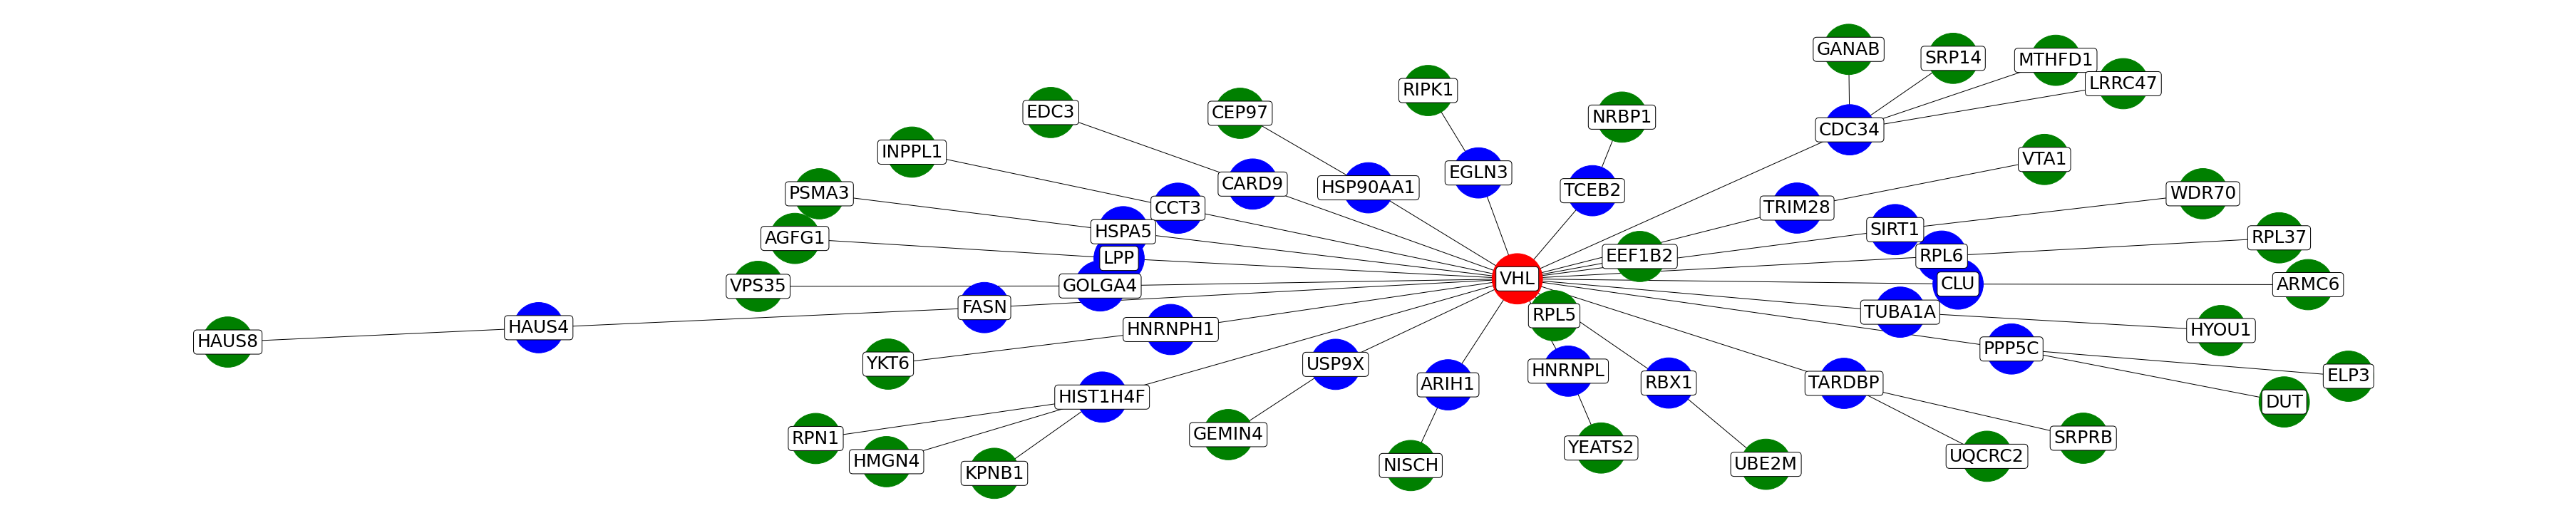

In [10]:
G1=nx.Graph()

if source not in G.nodes():
  print("*"*50)
  print(source," n'est pas dans la base de donnée")
  print("*"*50)
else:
  for i in list_target:
    if i in G.nodes():
      p=nx.shortest_path(G,source=source,target=i)
      j=0
      while j< len(p)-1:
        G1.add_node(p[j])
        G1.add_node(p[j+1])
        G1.add_edge(p[j],p[j+1])
        j+=1
    else:
      print("*"*50)
      print(i," n'est pas dans la base de donnée")
      print("*"*50)

  color_map=[]
  for n in G1.nodes():
    if n==source:
      color_map.append("red")
    elif n in list_target:
      color_map.append("green")
    else:
      color_map.append("blue")

  plt.figure(figsize=(50,10))
  nx.draw(G1,with_labels=True, node_color=color_map,node_size=5000,bbox=dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.2'), font_size=25)
  plt.savefig("Graph_short_path.png",format="PNG")
  files.download("Graph_short_path.png")
    

